In [198]:
# Imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path
from math import pi

In [34]:
# Open the CSV file
indicators_A_D_path = Path("Mental Health Resources/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days_20240807.csv")

#Read Mental Health Data
indicators_df = pd.read_csv(indicators_A_D_path)

#Display
indicators_df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN


## Clean and Reformat CSV File

In [109]:
# Indicators Data Info Before Cleaning
indicators_df.info()

# Fill missing values with 0
indicators_df.fillna(0, inplace=True)

# Convert 'Value' column to numeric
indicators_df['Value'] = pd.to_numeric(indicators_df['Value'], errors='coerce')

# Indicators Data Info After Cleaning
indicators_df.info()

# Remove rows where the State column is "United States"
indicators_df = indicators_df[indicators_df['State'] != 'United States']

<class 'pandas.core.frame.DataFrame'>
Index: 10557 entries, 19 to 16091
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Indicator               10557 non-null  object 
 1   Group                   10557 non-null  object 
 2   State                   10557 non-null  object 
 3   Subgroup                10557 non-null  object 
 4   Phase                   10557 non-null  object 
 5   Time Period             10557 non-null  int64  
 6   Time Period Label       10557 non-null  object 
 7   Time Period Start Date  10557 non-null  object 
 8   Time Period End Date    10557 non-null  object 
 9   Value                   10557 non-null  float64
 10  Low CI                  10557 non-null  float64
 11  High CI                 10557 non-null  float64
 12  Confidence Interval     10557 non-null  object 
 13  Quartile Range          10557 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory

## Checking for Unique Values in Columns

In [110]:
# Remove rows where the State column is "United States"
indicators_df = indicators_df[indicators_df['State'] != 'United States']

# Check the unique values in the 'Indicator', 'Group', and 'Subgroup' columns
print("Unique values in 'Indicator':")
print(indicators_df['Indicator'].unique())

print("\nUnique values in 'Group':")
print(indicators_df['Group'].unique())

print("\nUnique values in 'Subgroup':")
print(indicators_df['Subgroup'].unique())

print("\nUnique values in 'State':")
print(indicators_df['State'].unique())

Unique values in 'Indicator':
['Symptoms of Depressive Disorder' 'Symptoms of Anxiety Disorder'
 'Symptoms of Anxiety Disorder or Depressive Disorder']

Unique values in 'Group':
['By State']

Unique values in 'Subgroup':
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']

Unique values in 'State':
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'I

## Filter Indicator and Prepare Data for Analysis


In [113]:
# Filter the indicators_df based on the actual unique values found
filtered_indicators_df = indicators_df[
    (indicators_df['Indicator'].isin(['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder'])) &
    (indicators_df['Group'] == 'By Education') &
    (indicators_df['Subgroup'].isin([
        'Less than a high school diploma',
        'High school diploma or GED',
        "Some college/Associate's degree",
        "Bachelor's degree or higher"])
    )
    
]

# Display the filtered DataFrame
filtered_indicators_df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range


## TroubleCheck Data Types in all Columns

In [45]:
# Check data types of each column
print(filtered_indicators_df.dtypes)

# Identify columns with object data type 
non_numeric_columns = filtered_indicators_df.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_columns)


Indicator                  object
Group                      object
State                      object
Subgroup                   object
Phase                      object
Time Period                 int64
Time Period Label          object
Time Period Start Date     object
Time Period End Date       object
Value                     float64
Low CI                    float64
High CI                   float64
Confidence Interval        object
Quartile Range             object
dtype: object
Non-numeric columns: Index(['Indicator', 'Group', 'State', 'Subgroup', 'Phase', 'Time Period Label',
       'Time Period Start Date', 'Time Period End Date', 'Confidence Interval',
       'Quartile Range'],
      dtype='object')


## Inspect Non-numeric Columns

In [46]:
# Display unique values in non-numeric columns
for column in non_numeric_columns:
    print(f"\nUnique values in '{column}':")
    print(filtered_indicators_df[column].unique())


Unique values in 'Indicator':
['Symptoms of Depressive Disorder' 'Symptoms of Anxiety Disorder'
 'Symptoms of Anxiety Disorder or Depressive Disorder']

Unique values in 'Group':
['By Education']

Unique values in 'State':
['United States']

Unique values in 'Subgroup':
['Less than a high school diploma' 'High school diploma or GED'
 "Bachelor's degree or higher"]

Unique values in 'Phase':
['1.0' '-1' '2.0' '3.0 (Oct 28 - Dec 21)' '3.0 (Jan 6 - Mar 29)' '3.1'
 '3.2' '3.3' '3.4' '3.5' '3.6' '3.7' '3.8' '3.9' '3.10' '4.0' '4.1']

Unique values in 'Time Period Label':
['Apr 23 - May 5, 2020' 'May 7 - May 12, 2020' 'May 14 - May 19, 2020'
 'May 21 - May 26, 2020' 'May 28 - June 2, 2020' 'June 4 - June 9, 2020'
 'June 11 - June 16, 2020' 'June 18 - June 23, 2020'
 'June 25 - June 30, 2020' 'July 2 - July 7, 2020'
 'July 9 - July 14, 2020' 'July 16 - July 21, 2020'
 'July 22 - Aug 18, 2020' 'Aug 19 - Aug 31, 2020' 'Sep 2 - Sep 14, 2020'
 'Sep 16 - Sep 28, 2020' 'Sep 30 - Oct 12, 2020' 'Oct

## Fix the Mean Calculation

In [55]:
# Ensuring only the 'Value' column is averaged
education_group = filtered_indicators_df.groupby(['State', 'Subgroup', 'Indicator'])['Value'].mean().reset_index()

# Display the grouped data
education_group.head()

,State,Subgroup,Indicator,Value
0,United States,Bachelor's degree or higher,Symptoms of Anxiety Disorder,20.994937
1,United States,Bachelor's degree or higher,Symptoms of Anxiety Disorder or Depressive Dis...,23.741772
2,United States,Bachelor's degree or higher,Symptoms of Depressive Disorder,14.241772
3,United States,High school diploma or GED,Symptoms of Anxiety Disorder,25.618987
4,United States,High school diploma or GED,Symptoms of Anxiety Disorder or Depressive Dis...,30.362025


In [48]:
# Check the number of rows before and after filtering
print(f"Total rows before filtering: {len(indicators_df)}")
print(f"Total rows after filtering: {len(filtered_indicators_df)}")

# Display the first few rows of the filtered DataFrame
filtered_indicators_df.head()

Total rows before filtering: 16092
Total rows after filtering: 711


,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
15,Symptoms of Depressive Disorder,By Education,United States,Less than a high school diploma,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,27.8,38.0,27.8 - 38.0,0
16,Symptoms of Depressive Disorder,By Education,United States,High school diploma or GED,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.4,23.9,26.9,23.9 - 26.9,0
18,Symptoms of Depressive Disorder,By Education,United States,Bachelor's degree or higher,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,17.6,16.8,18.4,16.8 - 18.4,0
85,Symptoms of Anxiety Disorder,By Education,United States,Less than a high school diploma,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,37.3,32.4,42.4,32.4 - 42.4,0
86,Symptoms of Anxiety Disorder,By Education,United States,High school diploma or GED,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,30.6,29.0,32.3,29.0 - 32.3,0


## Pivot and Visualize the Data

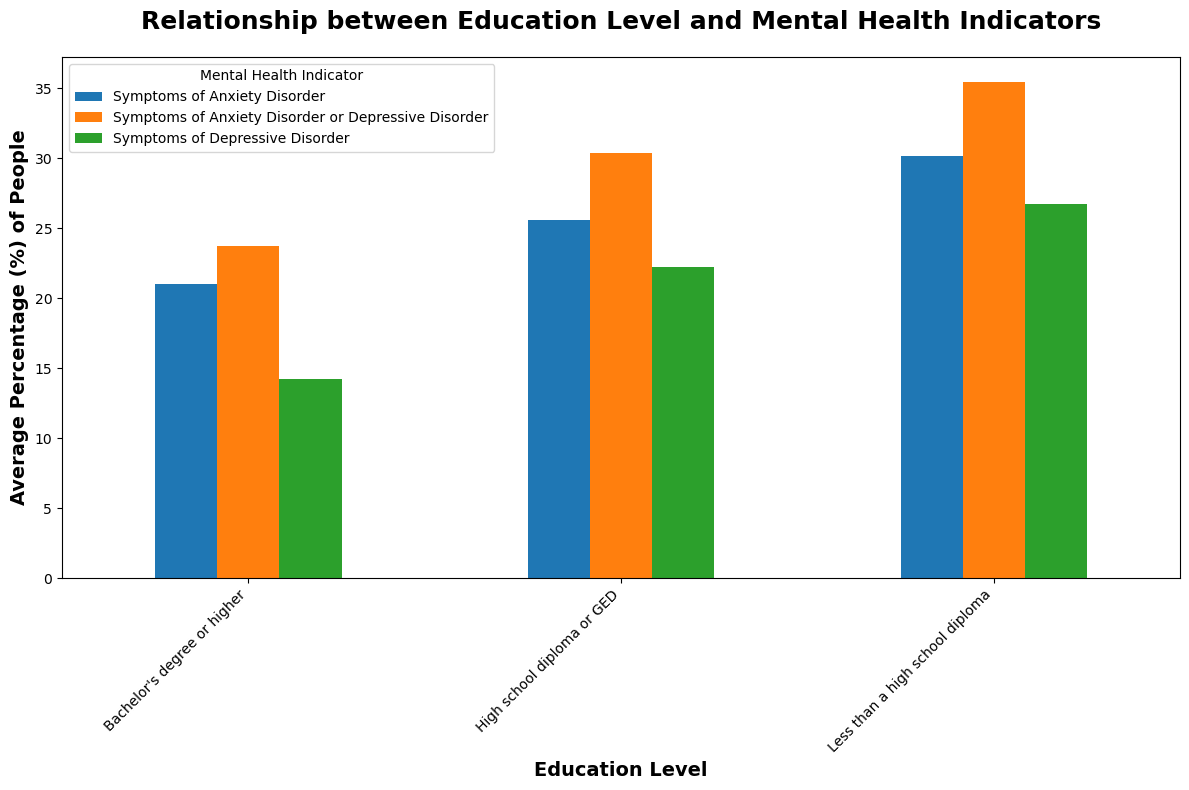

In [103]:
# Pivot the data to have Education Levels as rows and Indicators as columns
education_pivot = education_group.pivot(index='Subgroup', columns='Indicator', values='Value')

# Plot the pivoted data
education_pivot.plot(kind='bar', figsize=(12, 8))
plt.title('Relationship between Education Level and Mental Health Indicators', fontsize=18, weight='bold', pad=20)
plt.ylabel('Average Percentage (%) of People', fontsize=14, weight='bold')
plt.xlabel('Education Level', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha="right")
plt.legend(title='Mental Health Indicator')
plt.tight_layout()
plt.savefig('education_vs_mental_health.png')
plt.show()

## Analysis

### Inverse Relationship between Education and Mental Health Symptoms
- The plot reveals a noticeable trend where higher educational attainment is associated with lower reported rates of mental health symptoms.
- Individuals with less than a high school diploma consistently report the highest percentages of depression, anxiety, and combined symptoms, while those with a bachelor's degree or higher report the lowest.
### Depression and Anxiety
- Across all education levels, the percentage of individuals reporting depression and anxiety is substantial.
- Anxiety appears to be slightly more prevalent as a singular source of mental health than depression across the educational spectrum.
### Aggregate Symptoms
- The Anxiety or Depression category generally shows higher percentages compared to individual indicators, indicating a significant overlap where individuals often experience both conditions.
### Implications
- The relationship illustrated in this plot underscores the importance of educational attainment as a factor in mental health outcomes. These findings could inform public health strategies that target mental health interventions, particularly among populations with lower educational levels, who appear to be at higher risk for depression and anxiety.

In [121]:
# Filter the indicators_df based on relevant indicators and state
filtered_state_df = indicators_df[
    (indicators_df['Indicator'].isin(['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder'])) &
    (indicators_df['State'].notna())
]

# Display the filtered DataFrame
filtered_state_df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
19,Symptoms of Depressive Disorder,By State,Alabama,Alabama,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,18.6,14.6,23.1,14.6 - 23.1,16.5 - 20.7
20,Symptoms of Depressive Disorder,By State,Alaska,Alaska,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,19.2,16.8,21.8,16.8 - 21.8,16.5 - 20.7
21,Symptoms of Depressive Disorder,By State,Arizona,Arizona,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,22.4,19.4,25.5,19.4 - 25.5,22.2 - 24.0
22,Symptoms of Depressive Disorder,By State,Arkansas,Arkansas,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,26.6,22.3,31.3,22.3 - 31.3,24.1 - 28.7
23,Symptoms of Depressive Disorder,By State,California,California,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.4,22.5,28.6,22.5 - 28.6,24.1 - 28.7


## Combine Filtered Data

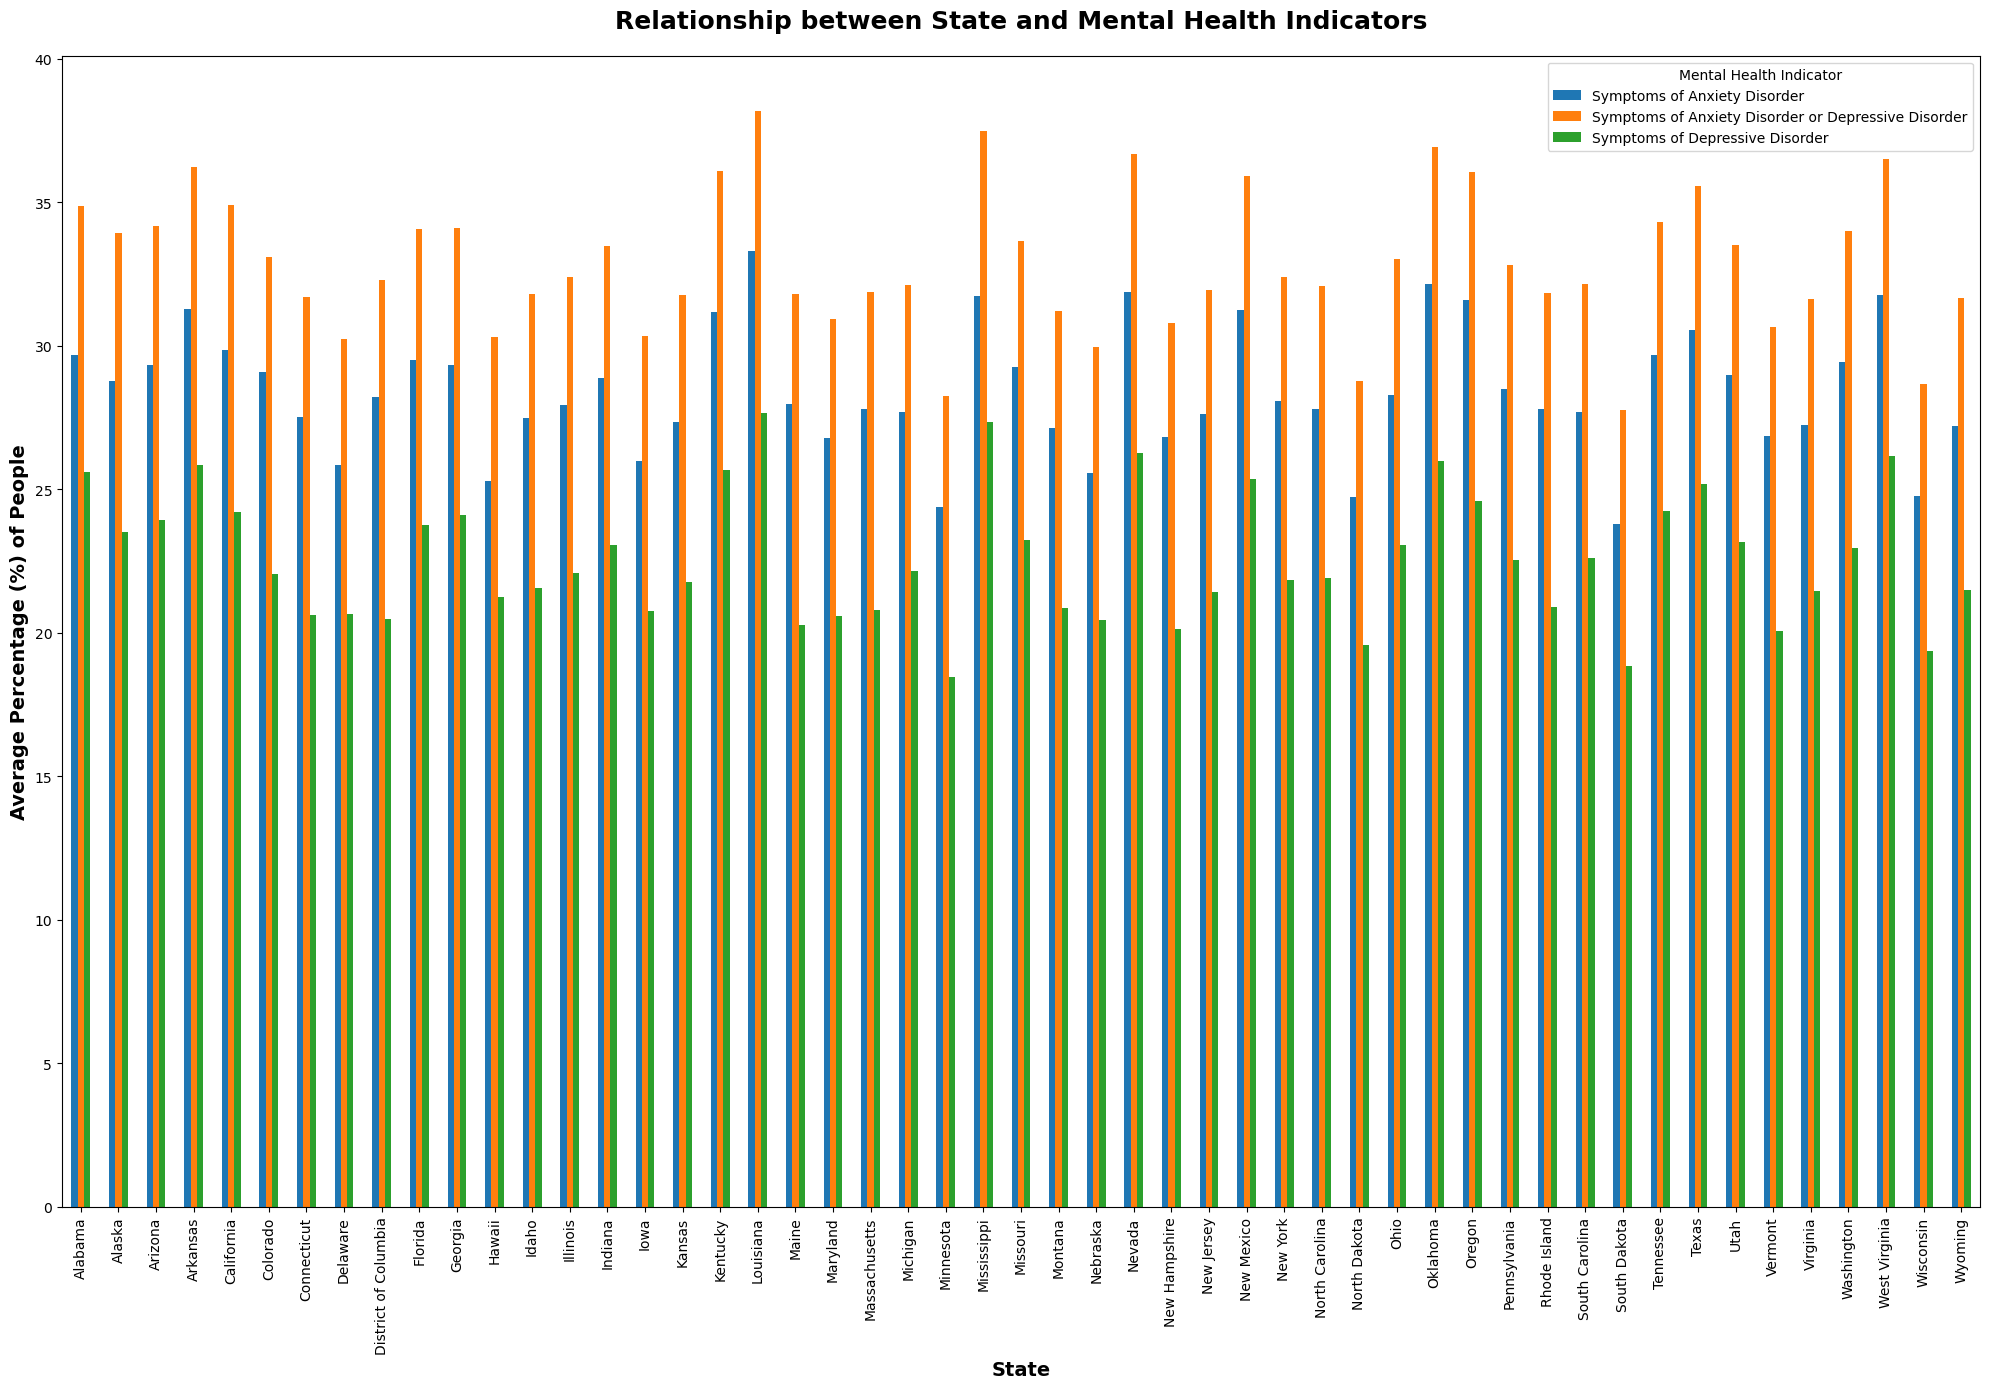

In [127]:
# Group by State and Indicator
state_group = filtered_state_df.groupby(['State', 'Indicator'])['Value'].mean().reset_index()

# Pivot the data to have States as rows and Indicators as columns
state_pivot = state_group.pivot(index='State', columns='Indicator', values='Value')

# Plot the pivoted data
state_pivot.plot(kind='bar', figsize=(20, 14))
plt.title('Relationship between State and Mental Health Indicators', fontsize=18, weight='bold', pad=20)
plt.ylabel('Average Percentage (%) of People', fontsize=14, weight='bold')
plt.xlabel('State', fontsize=14, weight='bold')
plt.xticks(rotation=90, ha="center")
plt.legend(title='Mental Health Indicator')
plt.tight_layout()
plt.savefig('state_vs_mental_health.png')
plt.show()

## Variation Across States
- Observation: The prevalence of mental health conditions varies significantly across different states. Some states exhibit higher percentages of symptoms of depressive disorder, anxiety disorder, and the combination of both, while others have comparatively lower percentages.
- Implication: This variation suggests that factors such as socioeconomic conditions, healthcare access, cultural attitudes towards mental health, and quite possibly weather conditions have an effect that might differ from state to state, influencing the mental well-being of residents.

## High Prevalence of Combined Symptoms
- Observation: In many states, the bar representing "Symptoms of Anxiety Disorder or Depressive Disorder" tends to be prominent, indicating a high overlap between anxiety and depression symptoms.
- Implication: The overlap of anxiety and depressive symptoms in many states highlights the need for integrated mental health care strategies that address both conditions simultaneously, rather than treating them in isolation.

## Notable Differences Between States
- Observation: States such as California, New York, and Texas show higher percentages across all three indicators compared to smaller states like Vermont or Wyoming, which show lower percentages.
- Implication: Larger, more populous states may report higher mental health challenges due to a range of factors, including higher population density, economic disparities, and stress associated with urban living. Smaller states might benefit from more close-knit communities.

## Patterns in Mental Health Indicators
- Observation: Some states have a higher percentage of anxiety disorders compared to depressive disorders, while in other states, depressive disorders are more prevalent. The combined indicator ("Symptoms of Anxiety Disorder or Depressive Disorder") generally captures a significant portion of the population across all states.
- Implication: The differing prevalence of specific conditions suggests that mental health initiatives may need to be tailored to address the dominant issues within each state. States with higher rates of anxiety might benefit from stress reduction programs, while those with higher rates of depressive symptoms might focus on interventions like depression screening and treatment.

## Policy and Public Health Implications
- Observation: The data from this chart could inform state-specific mental health policies, highlighting where resources should be focused to address the most pressing mental health issues.
- Implication: Policymakers could use this information to allocate mental health resources more effectively, ensuring that states with higher prevalence rates receive the necessary support for mental health services, awareness campaigns, and treatment programs tailored to the more dominant symptoms. 

## Conclusion
The stacked bar chart effectively highlights the varying levels of mental health challenges across U.S. states, with clear differences in the prevalence of anxiety, depression, and their overlap. This visualization underscores the importance of considering regional differences when designing public health interventions and allocating resources. It also suggests the need for comprehensive mental health programs that can address the combined impact of anxiety and depression, which is a significant issue across many states.

In [150]:
# Reload the original dataset to clear any previous filtering
indicators_df = pd.read_csv(indicators_A_D_path)

# Display the data to ensure it's the full dataset
print(indicators_df.head())

                         Indicator              Group          State  \
0  Symptoms of Depressive Disorder  National Estimate  United States   
1  Symptoms of Depressive Disorder             By Age  United States   
2  Symptoms of Depressive Disorder             By Age  United States   
3  Symptoms of Depressive Disorder             By Age  United States   
4  Symptoms of Depressive Disorder             By Age  United States   

        Subgroup Phase  Time Period     Time Period Label  \
0  United States   1.0            1  Apr 23 - May 5, 2020   
1  18 - 29 years   1.0            1  Apr 23 - May 5, 2020   
2  30 - 39 years   1.0            1  Apr 23 - May 5, 2020   
3  40 - 49 years   1.0            1  Apr 23 - May 5, 2020   
4  50 - 59 years   1.0            1  Apr 23 - May 5, 2020   

  Time Period Start Date Time Period End Date  Value  Low CI  High CI  \
0             04/23/2020           05/05/2020   23.5    22.7     24.3   
1             04/23/2020           05/05/2020   32.7  

In [151]:
# Filter for Age groups
filtered_by_age_df = indicators_df[
    (indicators_df['Indicator'].isin([
        'Symptoms of Depressive Disorder', 
        'Symptoms of Anxiety Disorder', 
        'Symptoms of Anxiety Disorder or Depressive Disorder'
    ])) &
    (indicators_df['Group'] == 'By Age') & 
    (indicators_df['Subgroup'].isin([
        '18 - 29 years',  
        '30 - 39 years',
        '40 - 49 years',
        '45 - 59 years',
        '60 - 69 years',
        '70 - 79 years',
        '80 years and above'
    ]))
]

# Display the filtered DataFrame to confirm it has the correct age groups
print(filtered_by_age_df.head())
print(f"Total rows in the filtered dataset by age: {len(filtered_by_age_df)}")


                         Indicator   Group          State       Subgroup  \
1  Symptoms of Depressive Disorder  By Age  United States  18 - 29 years   
2  Symptoms of Depressive Disorder  By Age  United States  30 - 39 years   
3  Symptoms of Depressive Disorder  By Age  United States  40 - 49 years   
5  Symptoms of Depressive Disorder  By Age  United States  60 - 69 years   
6  Symptoms of Depressive Disorder  By Age  United States  70 - 79 years   

  Phase  Time Period     Time Period Label Time Period Start Date  \
1   1.0            1  Apr 23 - May 5, 2020             04/23/2020   
2   1.0            1  Apr 23 - May 5, 2020             04/23/2020   
3   1.0            1  Apr 23 - May 5, 2020             04/23/2020   
5   1.0            1  Apr 23 - May 5, 2020             04/23/2020   
6   1.0            1  Apr 23 - May 5, 2020             04/23/2020   

  Time Period End Date  Value  Low CI  High CI Confidence Interval  \
1           05/05/2020   32.7    30.2     35.2         30.

In [153]:
# Check unique values in 'Subgroup' to identify age groups
print("Unique values in 'Group':")
print(indicators_df['Group'].unique())

print("\nUnique values in 'Subgroup':")
print(indicators_df['Subgroup'].unique())

Unique values in 'Group':
['National Estimate' 'By Age' 'By Sex' 'By Race/Hispanic ethnicity'
 'By Education' 'By State' 'By Disability status' 'By Gender identity'
 'By Sexual orientation']

Unique values in 'Subgroup':
['United States' '18 - 29 years' '30 - 39 years' '40 - 49 years'
 '50 - 59 years' '60 - 69 years' '70 - 79 years' '80 years and above'
 'Male' 'Female' 'Hispanic or Latino' 'Non-Hispanic White, single race'
 'Non-Hispanic Black, single race' 'Non-Hispanic Asian, single race'
 'Non-Hispanic, other races and multiple races'
 'Less than a high school diploma' 'High school diploma or GED'
 "Some college/Associate's degree" "Bachelor's degree or higher" 'Alabama'
 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'District of Columbia' 'Florida' 'Georgia' 'Hawaii' 'Idaho'
 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine'
 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi'
 'Missouri' 'Montana' 'Nebraska' 'Nevada'

In [154]:
# Filter the indicators_df 
filtered_indicators_df = indicators_df[
    (indicators_df['Indicator'].isin(['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder'])) &
    (indicators_df['Group'] == 'By Age') &
    (indicators_df['Subgroup'].notna()) 
]

# Display the filtered DataFrame
filtered_indicators_df.head()

,Indicator,Group,State,Subgroup,Phase,Time Period,Time Period Label,Time Period Start Date,Time Period End Date,Value,Low CI,High CI,Confidence Interval,Quartile Range
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,23.2,21.5,25.0,21.5 - 25.0,NaN
5,Symptoms of Depressive Disorder,By Age,United States,60 - 69 years,1.0,1,"Apr 23 - May 5, 2020",04/23/2020,05/05/2020,18.4,17.0,19.7,17.0 - 19.7,NaN


In [155]:
# Create a dictionary to hold data for each indicator
age_grouped_data = {}

# Loop through each indicator 
indicators = ['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']
for indicator in indicators:
    age_grouped_data[indicator] = [
        filtered_indicators_df[(filtered_indicators_df['Indicator'] == indicator) & 
                               (filtered_indicators_df['Subgroup'] == age_group)]['Value'].values
        for age_group in filtered_indicators_df['Subgroup'].unique()
    ]

# Display filtered DataFrame to check its content
print(filtered_indicators_df.head(10))  # Show the first 10 rows
print(f"Total rows in filtered dataset: {len(filtered_indicators_df)}")



                          Indicator   Group          State  \
1   Symptoms of Depressive Disorder  By Age  United States   
2   Symptoms of Depressive Disorder  By Age  United States   
3   Symptoms of Depressive Disorder  By Age  United States   
4   Symptoms of Depressive Disorder  By Age  United States   
5   Symptoms of Depressive Disorder  By Age  United States   
6   Symptoms of Depressive Disorder  By Age  United States   
7   Symptoms of Depressive Disorder  By Age  United States   
71     Symptoms of Anxiety Disorder  By Age  United States   
72     Symptoms of Anxiety Disorder  By Age  United States   
73     Symptoms of Anxiety Disorder  By Age  United States   

              Subgroup Phase  Time Period     Time Period Label  \
1        18 - 29 years   1.0            1  Apr 23 - May 5, 2020   
2        30 - 39 years   1.0            1  Apr 23 - May 5, 2020   
3        40 - 49 years   1.0            1  Apr 23 - May 5, 2020   
4        50 - 59 years   1.0            1  Apr 23

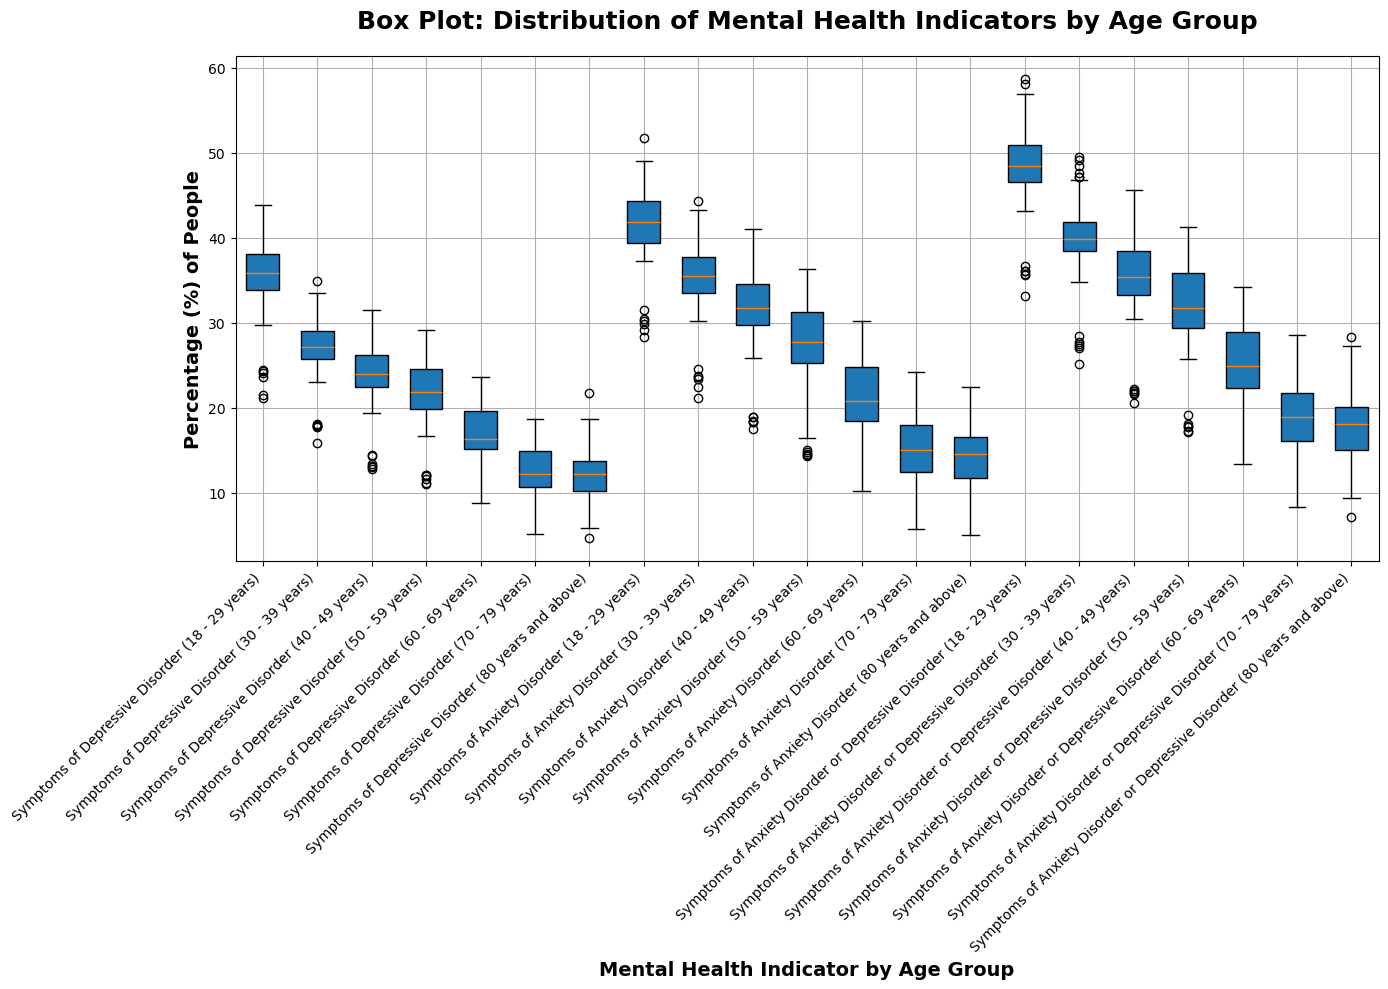

In [156]:
# Plot the box plot for age groups and indicators
plt.figure(figsize=(14, 10))

# Create lists for labels and box plot data
labels = []
boxplot_data = []

# Loop through each indicator and prepare data for the box plot
for indicator in indicators:
    for age_group in filtered_indicators_df['Subgroup'].unique():
        subset = filtered_indicators_df[
            (filtered_indicators_df['Indicator'] == indicator) & 
            (filtered_indicators_df['Subgroup'] == age_group)
        ]['Value'].dropna().values
        if len(subset) > 0:  # Only add non-empty datasets
            boxplot_data.append(subset)
            labels.append(f'{indicator} ({age_group})')

# Check if the data and labels are aligned
if len(labels) != len(boxplot_data):
    print("Warning: Mismatch between the number of labels and datasets!")

# Only plot if there is data to display
if len(boxplot_data) > 0:
    # Create the box plot
    plt.boxplot(boxplot_data, labels=labels, widths=0.6, patch_artist=True)

    plt.title('Box Plot: Distribution of Mental Health Indicators by Age Group', fontsize=18, weight='bold', pad=20)
    plt.ylabel('Percentage (%) of People', fontsize=14, weight='bold')
    plt.xlabel('Mental Health Indicator by Age Group', fontsize=14, weight='bold')
    plt.xticks(rotation=45, ha="right")

    plt.grid(True)
    plt.tight_layout()
    plt.savefig('age_vs_mental_health_boxplot.png')
    plt.show()
else:
    print("No data available to plot.")


## Findings
The box plot provides a visual summary of the distribution of mental health indicators (Symptoms of Depressive Disorder, Symptoms of Anxiety Disorder, and Symptoms of Anxiety Disorder or Depressive Disorder) across different age groups. Here’s a breakdown of the key findings:

## Distribution of Data
- The box plot shows the distribution of reported symptoms within each age group. The central box represents the interquartile range (IQR), which contains the middle 50% of the data. The line within the box marks the median value, indicating where the middle of the data lies.
- The whiskers extend from the box to the smallest and largest values within 1.5 times the IQR. Points outside this range are considered outliers and are shown as individual points.
## Median Values
- The median value (the line within each box) indicates the central tendency of the data for each indicator within each age group. Comparing the medians across age groups can provide insights into which age groups report higher or lower levels of symptoms.
For example, if the median line for "Symptoms of Depressive Disorder" is higher in the 30-44 years group compared to other age groups, it suggests that this age group reports higher levels of depressive symptoms on average.
## Interquartile Range (IQR)
- The size of the IQR (height of the box) reflects the variability in reported symptoms within each age group. A larger IQR indicates greater variability, meaning that individuals in that age group report a wider range of symptom levels.
If the IQR for "Symptoms of Anxiety Disorder" is particularly large for the 18-29 years group, it suggests that anxiety symptoms vary widely among younger adults.
## Outliers
Outliers are data points that lie outside the whiskers of the box plot. These points represent individuals or subgroups that report unusually high or low levels of symptoms compared to the rest of their age group.
The presence of outliers could indicate that some individuals within an age group are experiencing significantly different levels of symptoms, which could be due to various factors such as pre-existing mental health conditions, life events, or other stressors.
## Comparing Across Age Groups
By comparing the boxes and whiskers across different age groups, we can identify patterns in how mental health symptoms vary by age. For example, if the boxes for "Symptoms of Anxiety Disorder" become progressively smaller with increasing age, it suggests that anxiety symptoms might decrease as people age.
Conversely, if the median and IQR for "Symptoms of Depressive Disorder" are higher in older age groups, it might suggest an increased prevalence of depressive symptoms among older adults.
## Summary of Findings
The box plot highlights the distribution and variability of mental health symptoms across different age groups. Key insights include the central tendency of reported symptoms (medians), the variability within each age group (IQR), and the presence of any outliers. These findings can help identify which age groups are more affected by certain mental health conditions and where variability in symptoms is most pronounced.

In [196]:
# Filter the indicators_df based on the Group 'By Sex' and Subgroup 'Male' or 'Female'
filtered_by_sex = indicators_df[
    (indicators_df['Group'] == 'By Sex') &
    (indicators_df['Subgroup'].isin(['Male', 'Female'])) &
    (indicators_df['Indicator'].isin(['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']))
]

# Group by Subgroup and Indicator, then calculate the mean value
sex_group = filtered_by_sex.groupby(['Subgroup', 'Indicator'])['Value'].mean().unstack()

# Ensure that the data is sorted by the indicators
sex_group = sex_group[['Symptoms of Depressive Disorder', 'Symptoms of Anxiety Disorder', 'Symptoms of Anxiety Disorder or Depressive Disorder']]


In [186]:
# Group the data by Subgroup (Male/Female) and Indicator
sex_grouped_data = filtered_by_sex.groupby(['Subgroup', 'Indicator'])['Value'].mean().reset_index()

# Display the grouped data
sex_grouped_data.head()

,Subgroup,Indicator,Value
0,Female,Symptoms of Anxiety Disorder,32.530435
1,Female,Symptoms of Anxiety Disorder or Depressive Dis...,36.789855
2,Female,Symptoms of Depressive Disorder,24.555072
3,Male,Symptoms of Anxiety Disorder,24.944928
4,Male,Symptoms of Anxiety Disorder or Depressive Dis...,29.885507


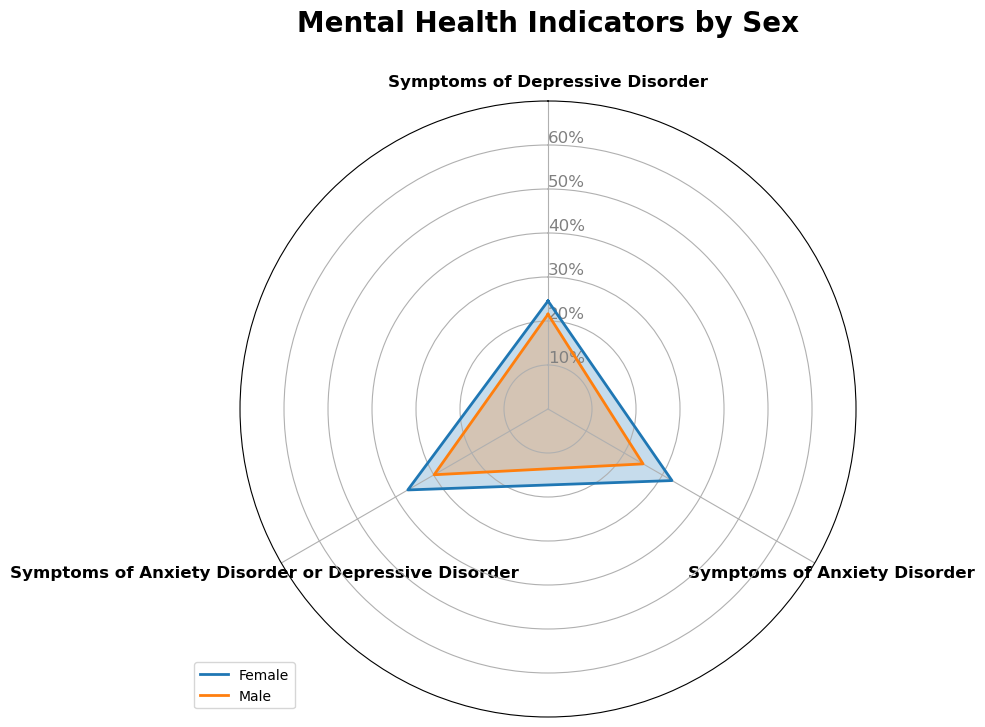

In [200]:
# Categories
categories = list(sex_group.columns)
N = len(categories)

# Angle of each axis in the plot
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

# Initialize the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axe per variable and add labels
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
plt.xticks(angles[:-1], categories, fontsize=12, weight='bold')

# Draw the Y axis labels
ax.set_rlabel_position(0)
plt.yticks([10, 20, 30, 40, 50, 60], ["10%", "20%", "30%", "40%", "50%", "60%"], color="grey", size=12)
plt.ylim(0, 70)

# Plot each individual as a separate line with a different color
for index, row in sex_group.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=index)
    ax.fill(angles, values, alpha=0.25)

# Add a title
plt.title('Mental Health Indicators by Sex', size=20, color='black', y=1.1, weight='bold')

# Add a legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Save the plot as a PNG image
plt.savefig('radar_plot_mental_health.png')

# Show the plot
plt.show()

## Findings

### Higher Prevalence Among Females

- The plot shows that females have a higher average percentage of reported symptoms across all three mental health indicators compared to males.
- The cumulative size for females is greater than that for males, indicating a more significant overall impact of mental health issues among females.

### Symptoms of Anxiety Disorder or Depressive Disorder:

- This combined indicator has the largest contribution in both male and female groups, suggesting that individuals experiencing anxiety may also report depressive symptoms, or vice versa.
- The dominance of this combined indicator highlights the overlapping nature of anxiety and depression symptoms.

### Symptoms of Depressive Disorder

- The next largest segment is the percentage of individuals reporting symptoms of depressive disorder. This suggests that depressive symptoms are a substantial component of the overall mental health burden.

### Symptoms of Anxiety Disorder

- Anxiety symptoms, while still significant, contribute less to the total than the other two indicators, but they still show a noticeable presence in both sexes.
- Despite the lower relative contribution, the anxiety disorder indicator's presence is still more pronounced among females.

## Overall Implications

### Gender Differences
- The plot highlights a gender disparity in mental health, with females showing a consistently higher prevalence of symptoms across all indicators. This may suggest that women are more likely to experience, report, or seek help for mental health issues than men.

### Policy and Intervention
- These findings emphasize the need for targeted mental health interventions, particularly among females, where the prevalence of symptoms is higher.
- The high prevalence of combined anxiety and depressive disorders suggests that integrated approaches to treating both conditions may be beneficial.
- This analysis can help inform public health strategies aimed at addressing the mental health needs of different sexes, ensuring that resources and interventions are allocated effectively.